In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from statistics import mean, stdev
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# Remove the 'customerID' column
data = data.drop(['customerID'], axis = 1)

In [5]:
# Convert categorical variables to numerical using Label Encoding
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [6]:
data = data.apply(lambda x: object_to_int(x))
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [7]:
# Separate features (X) and target variable (y)
X = data.drop(columns = ['Churn']).values
y = data['Churn'].values

In [8]:
# Initialize Decision Tree and Random Forest classifiers
model_DT = DecisionTreeClassifier(max_depth=5)     
model_RF = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                   max_depth=10, max_features="sqrt", random_state=50)

In [9]:
# Initialize StratifiedKFold for 10 folds with shuffling and a random seed
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Initialize lists to store evaluation metrics for each fold
accuracy_DT = []
accuracy_RF = []

cms_DT = []
cms_RF = []

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Fit the models on the training data
    model_DT.fit(X_train_fold, y_train_fold)
    model_RF.fit(X_train_fold, y_train_fold)
    
    # Predict labels for the test data
    y_pred_DT = model_DT.predict(X_test_fold)
    y_pred_RF = model_RF.predict(X_test_fold)
    
    # Compute the accuracy for this fold
    accuracy_DT_fold = accuracy_score(y_test_fold, y_pred_DT)
    accuracy_RF_fold = accuracy_score(y_test_fold, y_pred_RF)
    accuracy_DT.append(accuracy_DT_fold)
    accuracy_RF.append(accuracy_RF_fold)
        
    # Compute confusion matrices for this fold and append to list
    cm_DT = confusion_matrix(y_test_fold, y_pred_DT)
    cm_RF = confusion_matrix(y_test_fold, y_pred_RF)
    cms_DT.append(cm_DT)
    cms_RF.append(cm_RF)

# Compute the average confusion matrix across all folds
avg_cm_DT = np.mean(cms_DT, axis=0)
avg_cm_RF = np.mean(cms_RF, axis=0)

In [10]:
# Print the output.
print('List of possible accuracy of Decision Tree Classifier:', accuracy_DT)
print('\nList of possible accuracy of Random Forest:', accuracy_RF)

print('\nOverall Accuracy of Decision Tree Classifier:',
      mean(accuracy_DT) * 100, '%')
print('Overall Accuracy of Random Forest:',
      mean(accuracy_RF) * 100, '%')


List of possible accuracy of Decision Tree Classifier: [0.7929078014184398, 0.7886524822695036, 0.7815602836879433, 0.796875, 0.7911931818181818, 0.7869318181818182, 0.7954545454545454, 0.7940340909090909, 0.7840909090909091, 0.7826704545454546]

List of possible accuracy of Random Forest: [0.8028368794326242, 0.798581560283688, 0.8, 0.8139204545454546, 0.796875, 0.8011363636363636, 0.8011363636363636, 0.8068181818181818, 0.8025568181818182, 0.7926136363636364]

Overall Accuracy of Decision Tree Classifier: 78.94370567375887 %
Overall Accuracy of Random Forest: 80.16475257898131 %


In [11]:
# Display classification reports for Decision Tree and Random Forest
print('Desicion tree Classification Report')
print(classification_report(y_test_fold, y_pred_DT))

print('\nRandom Forest Classification Report')
print(classification_report(y_test_fold, y_pred_RF))

Desicion tree Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       517
           1       0.62      0.48      0.54       187

    accuracy                           0.78       704
   macro avg       0.72      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       517
           1       0.64      0.50      0.56       187

    accuracy                           0.79       704
   macro avg       0.74      0.70      0.71       704
weighted avg       0.78      0.79      0.78       704



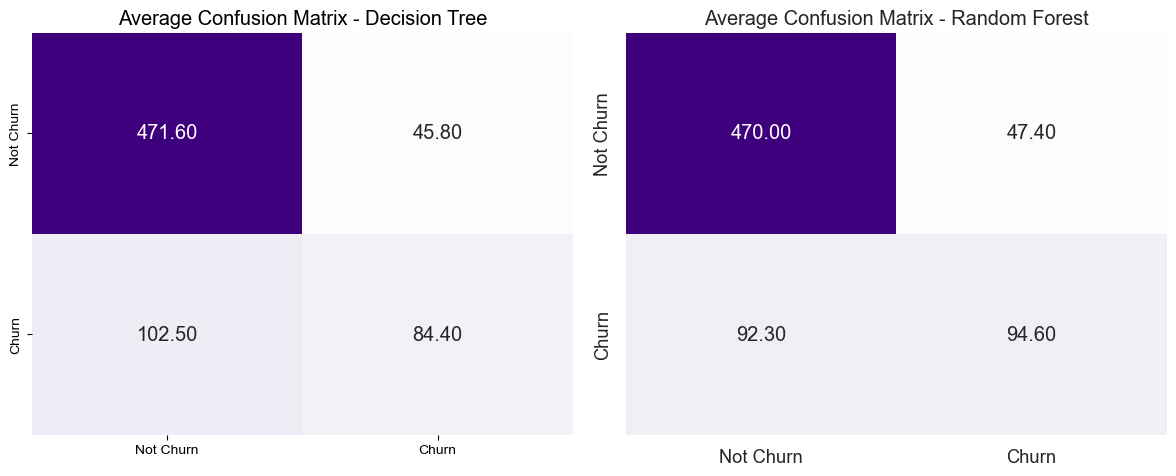

In [12]:
# Plot the average confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.set(font_scale=1.2)
sns.heatmap(avg_cm_DT, annot=True, fmt='.2f', cmap='Purples', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Average Confusion Matrix - Decision Tree')

plt.subplot(1, 2, 2)
sns.set(font_scale=1.2)
sns.heatmap(avg_cm_RF, annot=True, fmt='.2f', cmap='Purples', cbar=False, 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Average Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()